In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=1.2, style='darkgrid')  # 解决Seaborn中文显示问题
palette = 'deep'


In [16]:
df = pd.read_excel('../原始数据/附件1：物流网络历史货量数据.xlsx')
df

,场地1,场地2,日期,货量
0,DC3,DC5,2021-01-01,3
1,DC3,DC10,2021-01-01,4
2,DC3,DC14,2021-01-01,4
3,DC5,DC3,2021-01-01,41
4,DC5,DC9,2021-01-01,3
...,...,...,...,...
177842,DC73,DC5,2022-12-31,2479
177843,DC73,DC8,2022-12-31,150
177844,DC73,DC10,2022-12-31,8116
177845,DC73,DC14,2022-12-31,6139


In [17]:
# 添加年份列
ddf = df.copy()
ddf['年份'] = ddf['日期'].dt.year
ddf['月日'] = df['日期'].dt.strftime('%m-%d')
ddf

,场地1,场地2,日期,货量,年份,月日
0,DC3,DC5,2021-01-01,3,2021,01-01
1,DC3,DC10,2021-01-01,4,2021,01-01
2,DC3,DC14,2021-01-01,4,2021,01-01
3,DC5,DC3,2021-01-01,41,2021,01-01
4,DC5,DC9,2021-01-01,3,2021,01-01
...,...,...,...,...,...,...
177842,DC73,DC5,2022-12-31,2479,2022,12-31
177843,DC73,DC8,2022-12-31,150,2022,12-31
177844,DC73,DC10,2022-12-31,8116,2022,12-31
177845,DC73,DC14,2022-12-31,6139,2022,12-31


In [18]:
# 按月日排序
ddf.sort_values(by='月日').reset_index(drop=True, inplace=True)
ddf

,场地1,场地2,日期,货量,年份,月日
0,DC3,DC5,2021-01-01,3,2021,01-01
1,DC3,DC10,2021-01-01,4,2021,01-01
2,DC3,DC14,2021-01-01,4,2021,01-01
3,DC5,DC3,2021-01-01,41,2021,01-01
4,DC5,DC9,2021-01-01,3,2021,01-01
...,...,...,...,...,...,...
177842,DC73,DC5,2022-12-31,2479,2022,12-31
177843,DC73,DC8,2022-12-31,150,2022,12-31
177844,DC73,DC10,2022-12-31,8116,2022,12-31
177845,DC73,DC14,2022-12-31,6139,2022,12-31


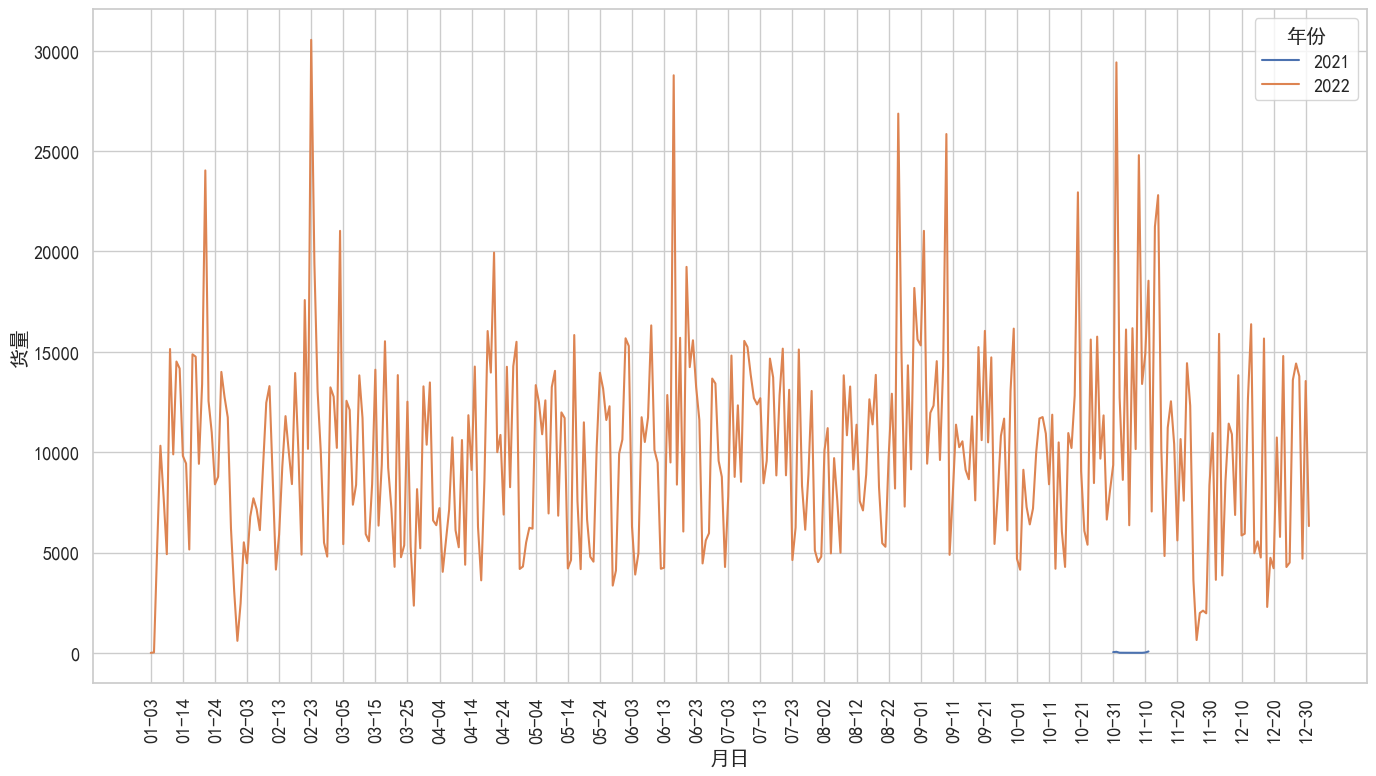

In [19]:
# 以年份为类目，按月份，DC25→DC62 货量-折线图
data = ddf[(ddf['场地1'] == 'DC25') & (ddf['场地2'] == 'DC62')].sort_values(by='月日').reset_index(drop=True)

style = 'whitegrid'

sns.set(font='SimHei', font_scale=1.2, style=style)
plt.figure(figsize=(14, 8))
sns.lineplot(data, x='月日', y='货量', hue='年份', palette='deep')

plt.xticks(data['月日'].unique()[::10], rotation=90)
plt.tight_layout()
plt.savefig(f'以年份为类目，按月份，DC25→DC62 货量-折线图-{style}.svg')
plt.show()

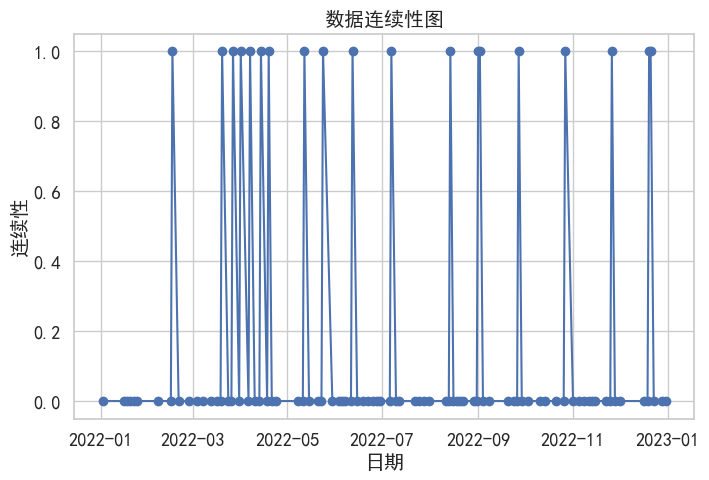

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 随机生成日期数据
dates = pd.date_range('2022-01-01', '2022-12-31', freq='D')
random_dates = np.random.choice(dates, size=100, replace=False)
random_dates = pd.Series(random_dates).sort_values().reset_index(drop=True)

# 计算日期之间的间隔
diffs = random_dates.diff()

# 判断是否有间隔大于1天的日期
is_continuous = (diffs <= pd.Timedelta('1 days'))

# 绘制连续性图
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(random_dates, is_continuous, '-o')
ax.set_xlabel('日期')
ax.set_ylabel('连续性')
ax.set_title('数据连续性图')
plt.show()


In [21]:
dateDf = df.groupby(by=['日期']).count().sort_index()
dateDf

,场地1,场地2,货量
日期,,,
2021-01-01,237,237,237
2021-01-02,233,233,233
2021-01-03,237,237,237
2021-01-04,245,245,245
2021-01-05,236,236,236
...,...,...,...
2022-12-27,323,323,323
2022-12-28,346,346,346
2022-12-29,320,320,320


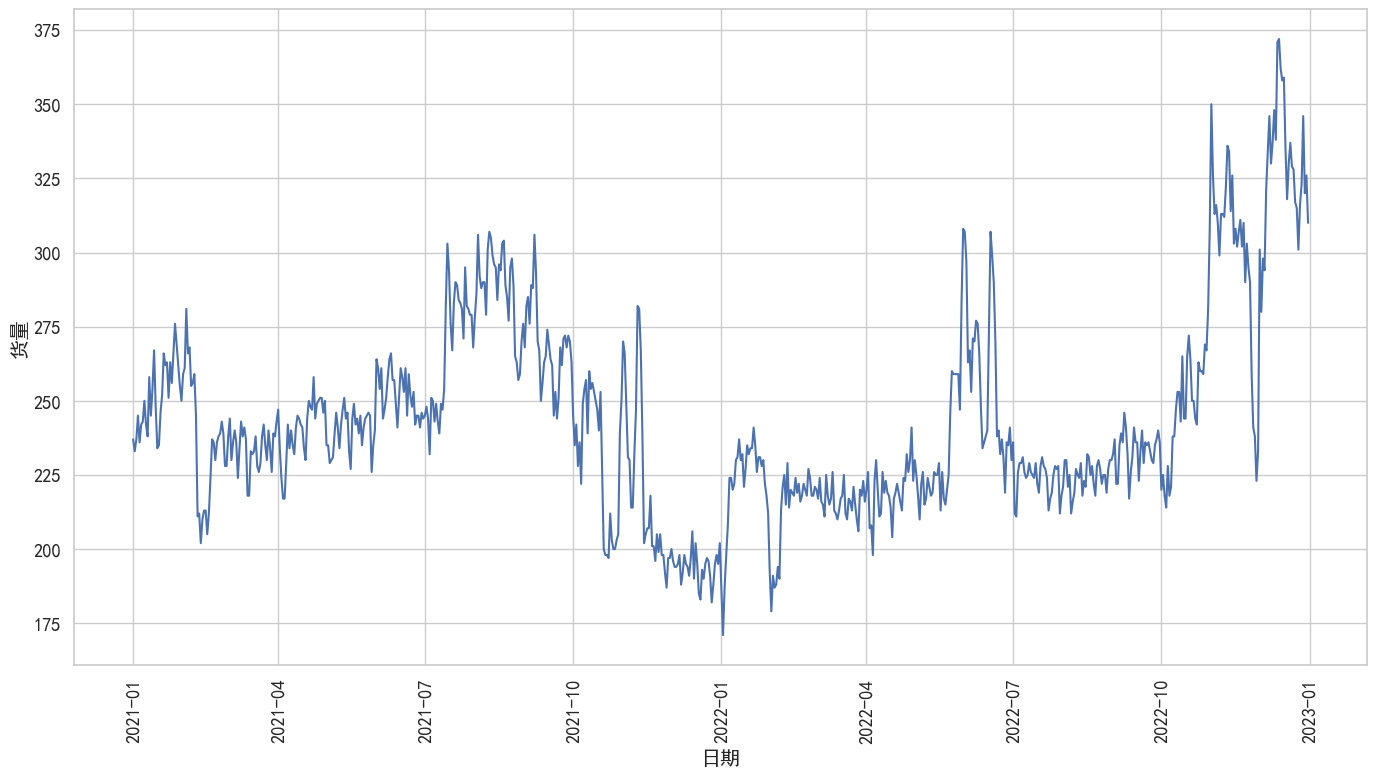

In [22]:

plt.figure(figsize=(14, 8))
sns.lineplot(dateDf, x='日期', y='货量')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

r2_score -0.40863709771965695


D:\Users\win\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Users\win\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Users\win\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Users\win\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-inve

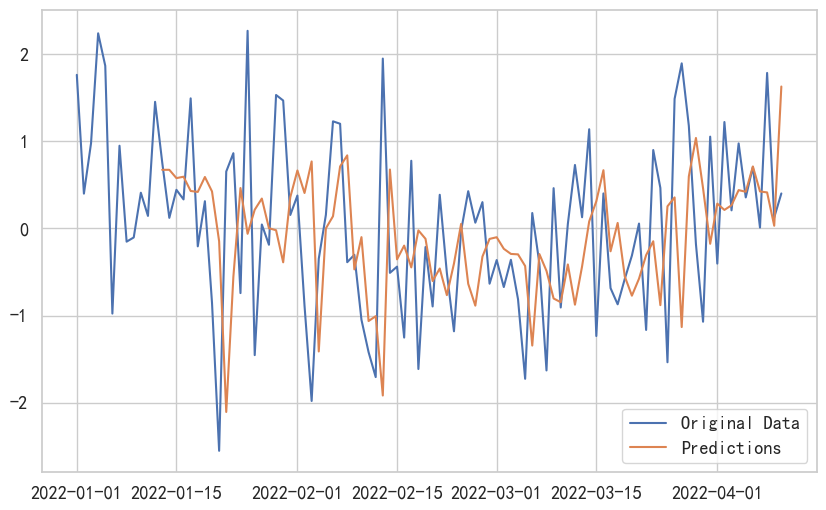

r2_score -0.40863709771965695
mse 1.3590687367698244
mae 0.8991628169808673
mape 2.2314409883920026


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 生成一个长度为100的随机时间序列
np.random.seed(0)
data = pd.Series(np.random.randn(100), index=pd.date_range('20220101', periods=100, freq='D'))

# 定义时间窗口大小和滚动步长
window_size = 12
step_size = 1

# 初始化模型
model = ARIMA(data[:-window_size], order=(1, 1, 1))

# 预测未来
preds = []
for i in range(0, len(data) - window_size, step_size):
    train_data = data.iloc[i:i + window_size]
    test_data = data.iloc[i + window_size:i + window_size + step_size]
    model = ARIMA(train_data, order=(1, 1, 1))
    model_fit = model.fit()
    pred = model_fit.forecast(steps=1)[0]
    preds.append(pred)

# 绘制预测结果
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')
plt.plot(data.index[-len(preds):], preds, label='Predictions')
plt.legend()
plt.show()

from sklearn.metrics import *

print('r2_score', r2_score(data[window_size:], preds))
print('mse', mean_squared_error(data[window_size:], preds))
print('mae', mean_absolute_error(data[window_size:], preds))
print('mape', mean_absolute_percentage_error(data[window_size:], preds))
